## Alejo Vinluan (abv210001)

# Maching Learning with SKLearn
The purpose of this Jupyter notebook is to gain experience using sklearn on a small dataset.

## Dataset Breakdown
The dataset gives the following columns:
* mpg - The average gas mileage of the vehicle

* cylinders - The number of cylinders the car has

* displacement - The engine size

* horsepower - The horsepower of the vehicle

* weight - The weight of the vehicle in pounds

* acceleration - The acceleration of a vehicle

* year - The year of the vehicle

* origin - The origin of the car (based on classification)

* name - The make and model of the car


## Read the Data
This section will use pandas to read the data, output the first few rows, and output the dimensions of the data.

In [22]:
import pandas as pd

# Import the data from the folder
data = pd.read_csv('data/Auto.csv')

# Output the first few rows
print("Head of Data Frame:")
print(data.head())

# Output the dimensions of the data
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])

Head of Data Frame:
    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
Number of Rows: 392
Number of Columns: 9


## Data Exploration
This section will describe the mpg, weight, and year columns.

### MPG Description
The MPG of a vehicle is a vehicle's "miles per gallon". This is how many miles a vehicle can drive per 1 gallon of fuel.

In [23]:
print("MPG Description")
print(data['mpg'].describe())

MPG Description
count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64


For the vehicles within the dataset, there is an average of 23.45 mpg. The vehicle with the worst fuel economy is at 9 mpg while the vehicle with the best fuel economy is at 46.6 mpg.

### Weight Description
This is a vehicle's curb weight. This will represent how many pounds a vehicle is.

In [24]:
print("Weight Description")
print(data['weight'].describe())

Weight Description
count     392.000000
mean     2977.584184
std       849.402560
min      1613.000000
25%      2225.250000
50%      2803.500000
75%      3614.750000
max      5140.000000
Name: weight, dtype: float64


According to the description returned, we find that:

* The average weight of a vehicle is 2977.58 lbs

* The lightest vehicle within the dataset is 1613 lbs.

* The heaviest vehicle in the dataset is 5140 lbs.


### Year Description
This column is the year the vehicle was released.

In [25]:
print("Year Description")
print(data['year'].describe())

Year Description
count    390.000000
mean      76.010256
std        3.668093
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: year, dtype: float64


According to the year column of the dataset, we find that:

* The average year of the vehicles in this dataset is 1976

* The oldest car in the dataset is from 1970

* The youngest car in the dataset is from 1982

## Explore Data Types
This section will check the datatypes of all columns, change both the origin and cylinders columns to categorical, and verify the changes utilizing the dtypes attribute.

In [26]:
# Print the types
print("Auto Dataset Types:")
print(data.dtypes)

# Change the 'origin' and 'cylinder' columns to categorical
data['origin'] = pd.Categorical(data['origin'])
data['cylinders'] = data['cylinders'].astype('category').cat.codes

# Verify the changes were completed
print("\nAfter changing origin and cylinder to categorical")
print("Origin column type:", data['origin'].dtypes)
print("Cylinders column type:", data['cylinders'].dtypes)

Auto Dataset Types:
mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object

After changing origin and cylinder to categorical
Origin column type: category
Cylinders column type: int8


## Delete rows with NA Values
This section with delete the rows with NA values and output the new dimension of the dataset.

In [27]:
# Drop the rows with NA
data = data.dropna()

print("Shape of Dataset After Dropping NA")
print(" Rows:", data.shape[0])
print(" of Columns:", data.shape[1])

Shape of Dataset After Dropping NA
 Rows: 389
 of Columns: 9


After dropping the rows with NA, the rows reduced from 392 to 389. 3 rows were dropped after removing rows with NA values.

## Modify the Columns
This section will create a new column named mpg_high. mpg_high will be categorical and return a 1 if that vehicle has a mpg higher than the average or 0 if it is equal to or lower than average.

In [28]:
# Get the average mpg
avg_mpg = data['mpg'].mean()
print("Average MPG:", avg_mpg)

# Create the mpg_high column
data['mpg_high'] = data.apply(lambda row: 1 if row.mpg > avg_mpg else 0, axis=1)

# Change type of mpg_high to categorical
data['mpg_high'] = pd.Categorical(data['mpg_high'])

# Delete MPG and Name columns
data = data.drop(['name', 'mpg'], axis=1)

# Print head of the new DataFrame
print("\nData head to show new mpg_high column")
print(data.head())

Average MPG: 23.490488431876607

Data head to show new mpg_high column
   cylinders  displacement  horsepower  weight  acceleration  year origin  \
0          4         307.0         130    3504          12.0  70.0      1   
1          4         350.0         165    3693          11.5  70.0      1   
2          4         318.0         150    3436          11.0  70.0      1   
3          4         304.0         150    3433          12.0  70.0      1   
6          4         454.0         220    4354           9.0  70.0      1   

  mpg_high  
0        0  
1        0  
2        0  
3        0  
6        0  


## Data Exploration with Graphs
This section will view the following graphs:

1. seaborn catplot on the mpg_high column

2. seaborn relplot with horsepower on the x axis, weight on the y axis, settings hue or style to mpg_high

3. seaborn boxplot with mpg_high on the x axis and weight on the y axis

### SeaBorn Catplot on mpg_high

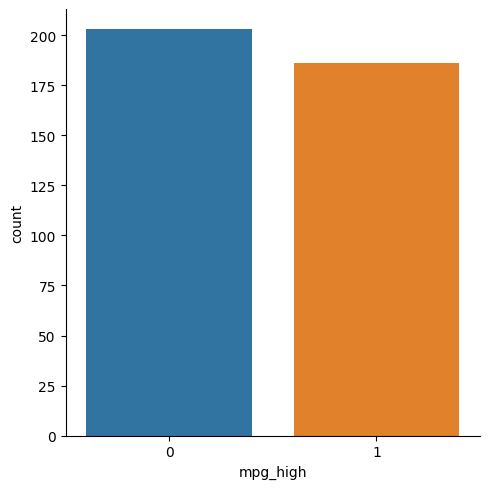

In [29]:
import seaborn as sns

# Seaborn Catplot on the mpg_high column
mpg_high_graph = sns.catplot(x='mpg_high', kind='count', data=data)

According to the data, we find there are more vehicles with average or below miles per gallon.

### Seaborn Relplot
In this graph, the relplot will have horsepower on the x axis, weight on the y axis, and setting hue to mpg_high.

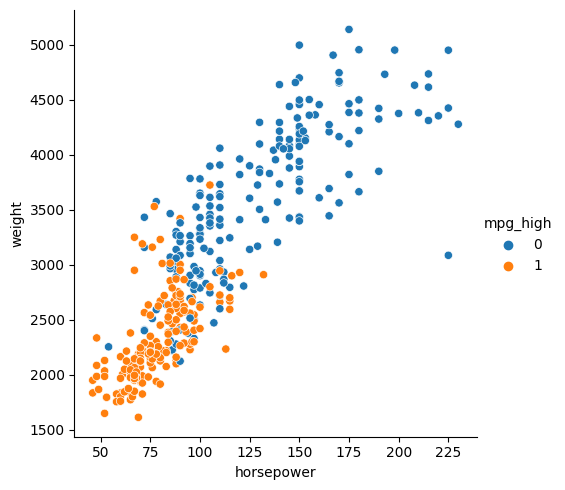

In [30]:
sns.relplot(x='horsepower', y='weight', hue='mpg_high', data=data)

According to the data, there seems to be a positive correlation between horsepower, weight, and mpg_high. As horsepower and weight increase, the mpg of the vehicles become lower than average.

### Seaborn Boxplot
This plot will display mpg_high on the x axis and weight on the y-axis.

<Axes: xlabel='mpg_high', ylabel='weight'>

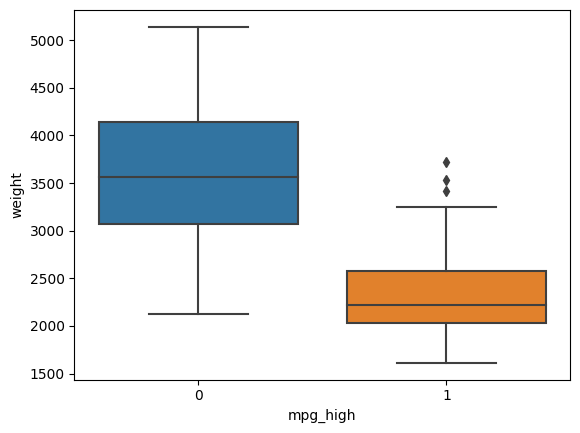

In [31]:
sns.boxplot(x='mpg_high', y='weight', data=data)

The boxplot shows us the distribution of vehicle weight for each of the mpg_high classes. It shows that a higher weight generally correlates to having a lower than average fuel economy.

## Train/Test Split
This section will divide the data into an 80/20 train test split. Train/test X dataframes will be all columns except mpg_high.

In [32]:
from sklearn.model_selection import train_test_split

x = data.drop('mpg_high', axis=1)
y = data['mpg_high']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

print("Train DataFrame Dimensions:")
print(" Number of Rows:", x_train.shape[0])
print(" Number of Columns:", x_train.shape[1])

print("\nTest DataFrame Dimensions")
print(" Number of Rows:", x_test.shape[0])
print(" Number of Columns:", x_test.shape[1])

Train DataFrame Dimensions:
 Number of Rows: 311
 Number of Columns: 7

Test DataFrame Dimensions
 Number of Rows: 78
 Number of Columns: 7


## Logistic Regression
This section will train a logistic regression model using solver lbfgs, test and evaulate the predictions, and print the metrics using the classification report.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Use Logistic Regression model using solver lbfgs
lr_model = LogisticRegression(solver='lbfgs', max_iter=10000)
lr_model.fit(x_train, y_train)

# Make predictions on dataset
predictions = lr_model.predict(x_test)

# Determine how accurate the predictions are
metrics = classification_report(y_test, predictions)
print(metrics)

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        50
           1       0.78      1.00      0.88        28

    accuracy                           0.90        78
   macro avg       0.89      0.92      0.89        78
weighted avg       0.92      0.90      0.90        78



## Decision Tree
This section will train a decision tree, test and evaluate the tree, print the classification report, and plot the tree.

In [34]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Use Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

# Make predictions on dataset
predictions = tree_model.predict(x_test)

# Determine how accurate the predictions are
metrics = classification_report(y_test, predictions)
print(metrics)

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        50
           1       0.82      0.96      0.89        28

    accuracy                           0.91        78
   macro avg       0.90      0.92      0.91        78
weighted avg       0.92      0.91      0.91        78



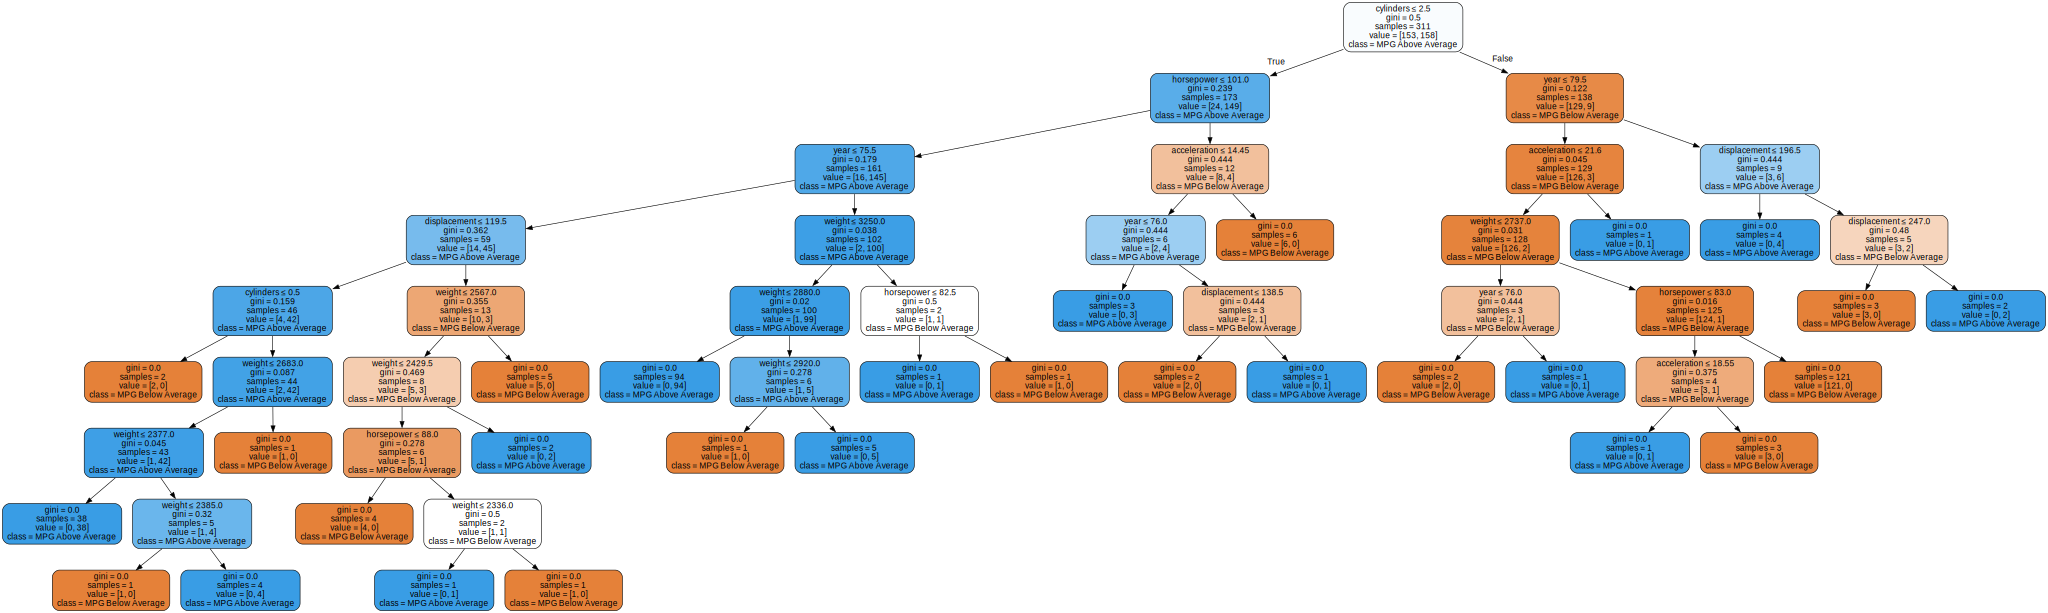

In [35]:
import graphviz

tree_data = export_graphviz(tree_model, out_file=None,
                                 feature_names=x.columns,
                                 class_names=["MPG Below Average", "MPG Above Average"],
                                 filled=True, rounded=True,
                                 special_characters=True)

tree_graph = graphviz.Source(tree_data, format="png")
tree_graph

## Neural Networks
In this section, 2 neural networks will be trained and evaluated. A comparison will be made between both neural networks.

The first neural network will utilize MLPClassification. The MLPClassifier uses a multi-layer perception algorithm that utilizes Backpropagation for training.

In [57]:
from sklearn.neural_network import MLPClassifier

# Create a Neural Network for classification
mlp_classifier = MLPClassifier()
mlp_classifier.fit(x_train, y_train)

# Make predictions on dataset
predictions = mlp_classifier.predict(x_test)

# Determine how accurate the predictions are
metrics = classification_report(y_test, predictions)
print(metrics)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        50
           1       0.79      0.82      0.81        28

    accuracy                           0.86        78
   macro avg       0.85      0.85      0.85        78
weighted avg       0.86      0.86      0.86        78



The 2nd neural network will use the stochastic gradient descent to make predictions. However, the settings will be adjusted from their default values. The changed values would be:

hidden_layer_sizes - The number of neurons in the ith hidden layer

* default = (100,) changed to (500,)

alpha -Strengh of the L2 regularization term, which is divided by the sample size when added to the loss.

* default = .0001 changed to .0005

learning_rate_init - the weight given to each step

* default = .001 changed to .01

power_t - The exponent for inverse scaling the learning rate.

* default = 0.5 changed to 0.2

In [53]:
# Create a Neural Network for classification
mlp_classifier = MLPClassifier(solver='adam',
                               alpha=.0005,
                               hidden_layer_sizes=(500,),
                               learning_rate_init=.01,
                               power_t=0.2)
mlp_classifier.fit(x_train, y_train)

# Make predictions on dataset
predictions = mlp_classifier.predict(x_test)

# Determine how accurate the predictions are
metrics = classification_report(y_test, predictions)
print(metrics)

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        50
           1       0.76      0.89      0.82        28

    accuracy                           0.86        78
   macro avg       0.85      0.87      0.85        78
weighted avg       0.87      0.86      0.86        78



### Comparisons of the Neural Networks
In these instances, both neural networks have an accuracy of 86%.

For precision, the first neural network better predicts classes with the 0 label for mpg_high. The first neural network predicts these at a 90% rate whereas the second neural network predicts those at an 93% rate. For rows with a 1 label, the second neural network outperforms the first with a 79% prediction rate compared to the first network's 76% prediction rate.

For recall, the first neural network was a more balanced model where there was an 88% rate for the 0 class and 82% rate for the 1 class. This is similar to the second neural network's 84% rate for the 0 class and 89% rate for the 1 class. This means the second model is identifying the 0 class at a higher rate than the first model, but it's prediction the 0 class at a lower rate.

## Analysis
As a summary here are the statistics for each model:

**Logistic Regression**

* Precision: 0 - 100%, 1 - 78%

* Recall: 0 - 84%, 1 - 100%

* F1-Score: 0 - 91%, 1 - 88%

* Accuracy 90%


**Decision Trees**

* Precision: 0 - 98%, 1 - 83%

* Recall: 0 - 88%, 1 - 96%

* F1-Score: 0 - 93%, 1 - 89%

* Accuracy 91%


**Neural Network #1**

* Precision: 0 - 90%, 1 - 79%

* Recall: 0 - 88%, 1 - 82%

* F1-Score: 0 - 89%, 1 - 81%

* Accuracy 86%


**Neural Network #2**

* Precision: 0 - 93%, 1 - 76%

* Recall: 0 - 84%, 1 - 89%

* F1-Score: 0 - 88%, 1 - 82%

* Accuracy 86%


### Best Performing Model
The best performing model out of the set was the decision tree. The decision tree's high precision for class 0 at 98% and high recall for class 1 at 96% exceeds those of other classes. The decision tree's overall accuracy of 91% is also greater than the other model's accuracy.

This may be the case since decision trees can handle relationships between classes and that the classes are not completely independent of each other. Both Logistic Regreesion and Neural Networks are linear models which don't help when there are relationships between each of the columns.


### SKLearn vs R
I prefer SKLearn significantly more than R. The errors that I get from Python and SKLearn are easier to read and interpret than R. This allows me to better implement the models that SKLearn utilize.

I feel like I am spending more time in R attempting to fit the model and wonder why my model isn't working. With SKLearn and Python, the documentation is concise and I can see why my models aren't working relatively fast.
